In [1]:
# Importing the dependencies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
from config import weather_api_key
import requests
import time
from datetime import datetime

In [2]:
# Creating array of sets of random latitude and longitude
lats = np.random.uniform(low=-90.000,high=90.000, size = 1500)
lngs = np.random.uniform(low=-180.000,high=180.000, size = 1500)
latLngs = zip(lats,lngs)
latLngs

In [3]:
# Adding the latitudes & longitudes to a list
coordinates = list(latLngs)

In [4]:
#Creating list of cities
cities = []

#Identifying the nearest city for each lat and long combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name

    #Checking to see if the city is unique. If so, it is added to the "cities" list.
    if city not in cities:
        cities.append(city)

#print the city count to confirm there are enough
len(cities)

640

In [5]:
url = 'https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + weather_api_key
#Creating an empty list to hold the weather data
cityData = []

#Printing the beginning of the logging
print("Beginning Data Retrieval      ")
print('------------------------------')

#Creating counters
recordCount = 1
setCount = 1

#looping through all the cities in our list
for i, city in enumerate(cities):
    #grouping cities into sets of 50 for logging purposes
    if i % 50 == 0 and i >= 50:
        setCount += 1
        recordCount = 1
        time.sleep(60)

    #creating endpoint URL with each city
    cityURL = url + '&q=' + city.replace(' ','+')

    #logging the URL, Record and set numbers and the city
    print(f'Processing Record {recordCount} of Set {setCount} | {city}')
    #adding 1 to record count
    recordCount += 1
# Run an API request for each of the cities.
    try:
        #parsing the json and retrieving the data
        cityWeather = requests.get(cityURL).json()

        #parsing out the needed data
        cityLat = cityWeather['coord']['lat']
        cityLng = cityWeather['coord']['lon']
        cityMaxTemp = cityWeather['main']['temp_max']
        cityHumidity = cityWeather['main']['humidity']
        cityClouds = cityWeather['clouds']['all']
        cityWind = cityWeather['wind']['speed']
        cityCountry = cityWeather['sys']['country']

        #Converting date to ISO standard
        cityDate = datetime.utcfromtimestamp(cityWeather['dt']).strftime('%Y-%m-%d %H:%M:%S')

        #Apprending the city information into cityData list
        cityData.append({'City': city.title(),
                         'Lat':cityLat,
                         'Lng':cityLng,
                         'Max Temp':cityMaxTemp,
                         'Humidity':cityHumidity,
                         'Cloudiness':cityClouds,
                         'Wind Speed':cityWind,
                         'Country':cityCountry,
                         'Date':cityDate})
# If an error is experienced, skip the city.
    except:
        print('City not found. Skipping City...')
        pass
    #Indicate that data loading is complete
print('--------------------------')
print('Data Retrieval Complete!')
print('--------------------------')

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | wrzesnia
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | dikson
Processing Record 4 of Set 1 | gat
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping City...
Processing Record 6 of Set 1 | zhigansk
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | victoria
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | kovdor
Processing Record 11 of Set 1 | brownsville
Processing Record 12 of Set 1 | mahebourg
Processing Record 13 of Set 1 | methoni
Processing Record 14 of Set 1 | high level
Processing Record 15 of Set 1 | saskylakh
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | batticaloa
Processing Record 18 of Set 1 | shetpe
Processing Record 19 of Set 1 | rovaniemi
Processing Record 20 of Set 1 | hofn
Processing Record 21 of Set 1 | arlit
Processing Record 22 of Set 1 | rikitea
Processing Record 23 o

In [6]:
len(cityData)

581

In [7]:
#Converting the array of dictionaries to a pandas DataFrame
cityDataDf = pd.DataFrame(cityData)

#Reordering the columns
newColumnOrder = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
cityDataDf = cityDataDf[newColumnOrder]

cityDataDf.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Wrzesnia,PL,2021-12-04 01:17:11,52.3251,17.5652,33.87,68,100,13.24
1,Jamestown,US,2021-12-04 01:17:12,42.0970,-79.2353,35.10,84,90,5.01
2,Dikson,RU,2021-12-04 01:17:12,73.5069,80.5464,-22.04,95,74,12.55
3,Gat,IL,2021-12-04 01:17:13,31.6100,34.7642,60.40,58,100,3.24
4,Zhigansk,RU,2021-12-04 01:17:14,66.7697,123.3711,-25.28,90,100,19.64


In [8]:
# Creating the output file (CSV)
outputDataFile = 'weather_data/cities.csv'
#Exporting the cityData into a CSV
cityDataDf.to_csv(outputDataFile, index_label='City_ID')

In [9]:
#Extract relevant fields from the datafram for plotting
lats = cityDataDf['Lat']
maxTemps = cityDataDf['Max Temp']
humidity = cityDataDf['Humidity']
cloudiness = cityDataDf['Cloudiness']
windSpeed = cityDataDf['Wind Speed']

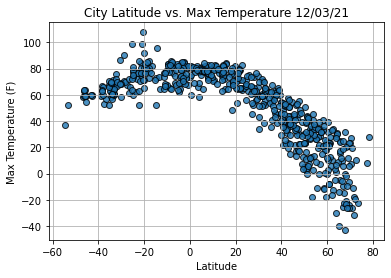

In [10]:
#Importing time module
import time
#Building the scatter plot for lat vs max temp
plt.scatter(lats,
            maxTemps,
            edgecolor='black', linewidth = 1, marker='o',
            alpha=0.8,label='Cities')

#Adding graph properties
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

#Saving the figure
plt.savefig('weather_data/Fig1.png')

plt.show()

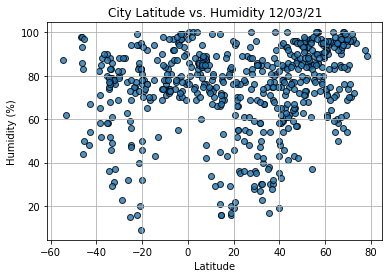

In [11]:
#Building the scatter plot for lat vs humidity
plt.scatter(lats,
            humidity,
            edgecolor='black', linewidth = 1, marker='o',
            alpha=0.8,label='Cities')

#Adding graph properties
plt.title(f'City Latitude vs. Humidity '+ time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Saving the figure
plt.savefig('weather_data/Fig2.png')

plt.show()

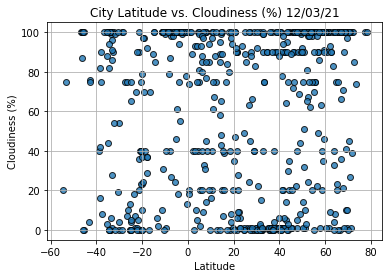

In [12]:
#Building the scatter plot for lat vs cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor='black', linewidth = 1, marker='o',
            alpha=0.8,label='Cities')

#Adding graph properties
plt.title(f'City Latitude vs. Cloudiness (%) '+ time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Saving the figure
plt.savefig('weather_data/Fig3.png')

plt.show()

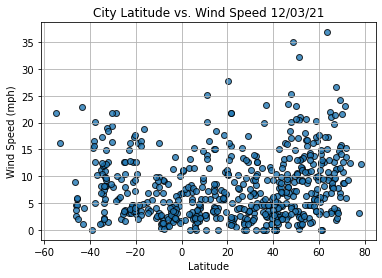

In [13]:
#Building the scatter plot for lat vs cloudiness
plt.scatter(lats,
            windSpeed,
            edgecolor='black', linewidth = 1, marker='o',
            alpha=0.8,label='Cities')

#Adding graph properties
plt.title(f'City Latitude vs. Wind Speed '+ time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

#Saving the figure
plt.savefig('weather_data/Fig4.png')

plt.show()

In [17]:
#Import linregress
from scipy.stats import linregress

#Create a function to perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label,text_coordinates):
    #Run regresssion on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    #calculating the regression line 'y values' from the slope and intercept
    regress_values = x_values * slope + intercept
    #Get the equation of the line
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

    #Creating a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,'r')

    #Annotating the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [18]:
index13 = cityDataDf.loc[13]
index13

City                    Saskylakh
Country                        RU
Date          2021-12-04 01:17:20
Lat                       71.9167
Lng                      114.0833
Max Temp                   -17.72
Humidity                       96
Cloudiness                    100
Wind Speed                  13.51
Name: 13, dtype: object

In [19]:
cityDataDf['Lat'] >= 0

0      True
1      True
2      True
3      True
4      True
       ... 
576    True
577    True
578    True
579    True
580    True
Name: Lat, Length: 581, dtype: bool

In [43]:
northern_hemi_df = cityDataDf.loc[(cityDataDf['Lat'] >= 0)]
southern_hemi_df = cityDataDf.loc[(cityDataDf['Lat'] < 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Wrzesnia,PL,2021-12-04 01:17:11,52.3251,17.5652,33.87,68,100,13.24
1,Jamestown,US,2021-12-04 01:17:12,42.0970,-79.2353,35.10,84,90,5.01
2,Dikson,RU,2021-12-04 01:17:12,73.5069,80.5464,-22.04,95,74,12.55
3,Gat,IL,2021-12-04 01:17:13,31.6100,34.7642,60.40,58,100,3.24
4,Zhigansk,RU,2021-12-04 01:17:14,66.7697,123.3711,-25.28,90,100,19.64


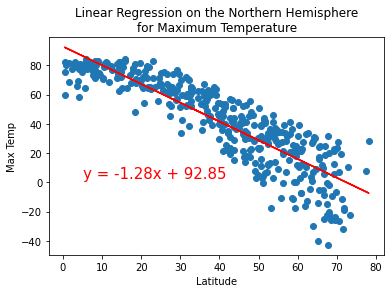

In [33]:
# Linear regression on the Northern Hemisphere *Max Temp*
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

#Call the function
plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Northern Hemisphere' +
                        '\nfor Maximum Temperature', 'Max Temp', (5,3))

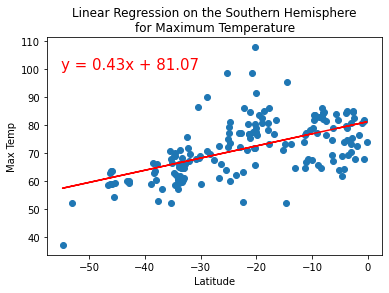

In [38]:
# Linear regression on the Southern Hemisphere *Max Temp*
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

#Calling linear regression function
plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Southern Hemisphere' +
                       '\nfor Maximum Temperature', 'Max Temp', (-55,100))

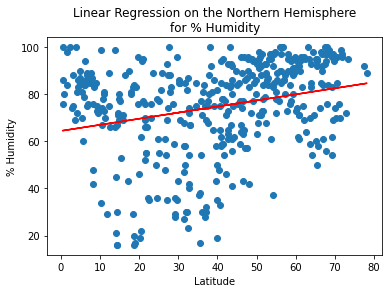

In [45]:
# Linear regression on the Northern Hemisphere *Humidity*
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

#Calling linear regression function
plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Northern Hemisphere'+
                        '\nfor % Humidity', '% Humidity',(40,10))


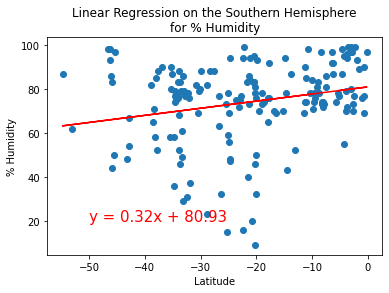

In [47]:
# Linear regression on the Southern Hemisphere *Humidity*
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

#Calling linear regression function
plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Southern Hemisphere'+
                       '\nfor % Humidity', '% Humidity',(-50,20))

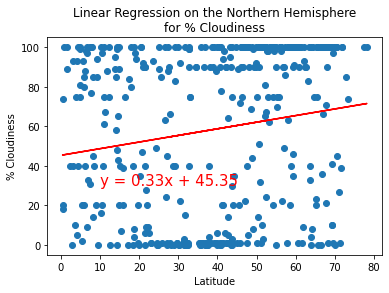

In [49]:
# Linear regression on the Northern Hemisphere *Cloudiness*
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

#Calling linear regression function
plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Northern Hemisphere'+
                       '\nfor % Cloudiness', '% Cloudiness',(10,30))

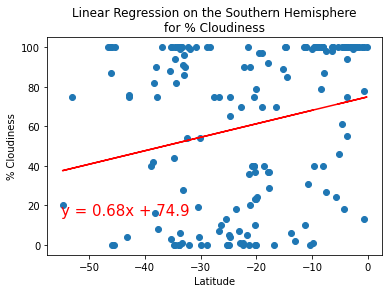

In [52]:
# Linear regression on the Southern Hemisphere *Cloudiness*
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

#Calling linear regression function
plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Southern Hemisphere'+
                       '\nfor % Cloudiness', '% Cloudiness',(-55,15))

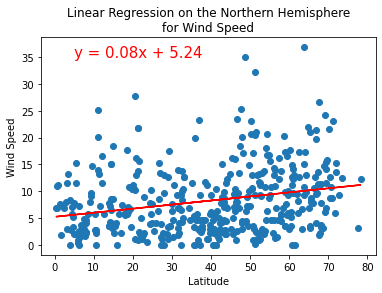

In [55]:
# Linear regression on the Northern Hemisphere *Wind Speed*
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

#Calling linear regression function
plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Northern Hemisphere'+
                       '\nfor Wind Speed', 'Wind Speed',(5,35))

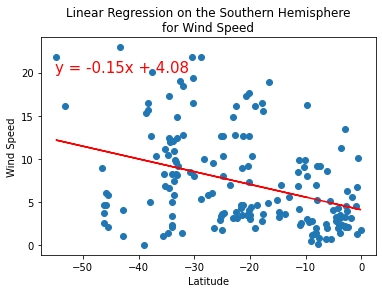

In [57]:
# Linear regression on the Southern Hemisphere *Wind Speed*
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

#Calling linear regression function
plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Southern Hemisphere'+
                       '\nfor Wind Speed', 'Wind Speed',(-55,20))